# Compression experiments

In [ ]:
pip install iteration_utilities

     |████████████████████████████████| 283 kB 11.8 MB/s 


In [ ]:
# Imports.
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA

from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import losses
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, fashion_mnist

TensorFlow 1.x selected.


In [ ]:
from iteration_utilities import deepflatten

In [ ]:
data_path = 'Metro_Interstate_Traffic_Volume.csv'
traffic = pd.read_csv(data_path)

FileNotFoundError: ignored

In [ ]:
traffic = traffic.rename(columns={'date_time': 'ds', 'traffic_volume': 'y'})
y = traffic['y']
ds = traffic['ds']
X = traffic.drop(['holiday','ds', 'weather_main','snow_1h', 'weather_description'], axis = 1)
X

,temp,rain_1h,clouds_all,y
0,288.28,0.0,40,5545
1,289.36,0.0,75,4516
2,289.58,0.0,90,4767
3,290.13,0.0,90,5026
4,291.14,0.0,75,4918
...,...,...,...,...
48199,283.45,0.0,75,3543
48200,282.76,0.0,90,2781
48201,282.73,0.0,90,2159
48202,282.09,0.0,90,1450


In [ ]:
X['rain_1h'] = X['rain_1h'].replace(9831.30,55.63)

In [ ]:
TIME_STEPS = 256

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values.iloc[i : (i + time_steps),:])
    
    return np.stack(output)

train_dataset_m = create_sequences(X)
print("Training input shape: ", train_dataset_m.shape)
x_train_m = train_dataset_m

In [ ]:
# Calculate vq-vae loss.
def vq_vae_loss_wrapper(data_variance, commitment_cost, quantized, x_inputs):
    def vq_vae_loss(x, x_hat):
        recon_loss = losses.mse(x, x_hat) / data_variance

        e_latent_loss = K.mean((K.stop_gradient(quantized) - x_inputs) ** 2)
        q_latent_loss = K.mean((quantized - K.stop_gradient(x_inputs)) ** 2)
        loss = q_latent_loss + commitment_cost * e_latent_loss

        return recon_loss + loss #* beta
    return vq_vae_loss

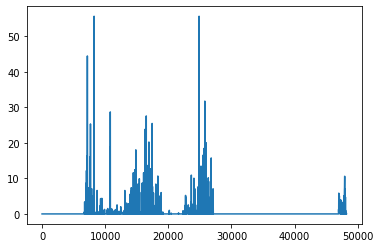

In [ ]:
X['rain_1h'].plot()

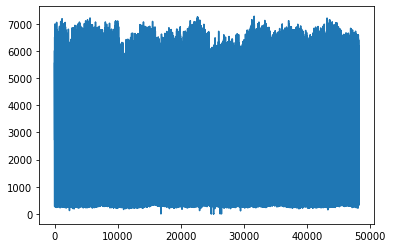

In [ ]:
y.plot()

## Multivariate

In [ ]:
temp = [0.032, 0.026194, 0.00289, 0.26440, 0.015445, 0.036, 0.031, 0.107, 0.4766]
rain_1h	= [13.136, 0.708032, 1.2413, 4.1300, 26.4812, 0.75213, 0.075, 12.29, 5.004]
clouds_all = [0.0236, 0.0485, 0.1068, 0.0218, 0.0019, 0.1262, 0.009, 0.054, 0.3497]
y = [0.0015, 0.026, 0.0122, 0.001149, 0.0076, 0.14620, 0.021, 0.018, 0.44]
compression = [0.000165, 0.000165, 0.000165, 0.000165, 0.00016, 0.00016, 0.00016, 0.00077,0.00024]

Text(0, 0.5, 'Reconstruction error')

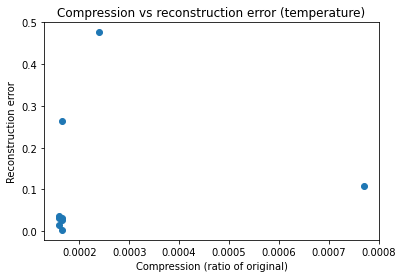

In [ ]:
plt.scatter(compression, temp)
plt.title('Compression vs reconstruction error (temperature)')
plt.xlabel('Compression (ratio of original)')
plt.ylabel('Reconstruction error')

Text(0, 0.5, 'Reconstruction error')

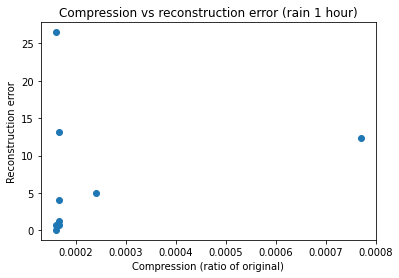

In [ ]:
plt.scatter(compression, rain_1h)
plt.title('Compression vs reconstruction error (rain 1 hour)')
plt.xlabel('Compression (ratio of original)')
plt.ylabel('Reconstruction error')

Text(0, 0.5, 'Reconstruction error')

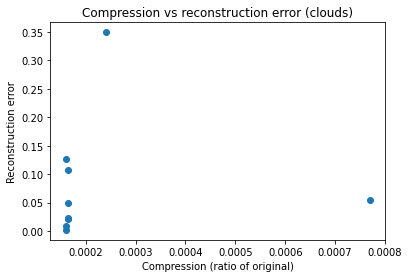

In [ ]:
plt.scatter(compression, clouds_all)
plt.title('Compression vs reconstruction error (clouds)')
plt.xlabel('Compression (ratio of original)')
plt.ylabel('Reconstruction error')

Text(0, 0.5, 'Reconstruction error')

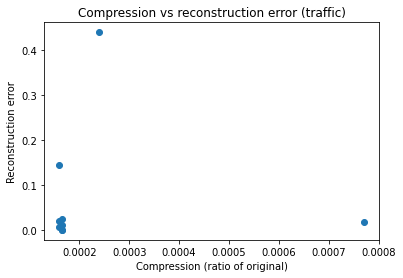

In [ ]:
plt.scatter(compression, y)
plt.title('Compression vs reconstruction error (traffic)')
plt.xlabel('Compression (ratio of original)')
plt.ylabel('Reconstruction error')

Text(0.5, 0, 'Number of embeddings in the model')

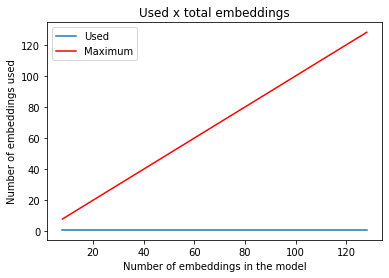

In [ ]:
# emb_dim = 8 
n_embeddings = [128, 64, 32, 16, 8]
n_used_embeddings = [1, 1, 1, 1, 1]
plt.plot(n_embeddings, n_used_embeddings, label = "Used")
plt.plot(n_embeddings, n_embeddings, color = 'red', label = 'Maximum')
plt.legend()
plt.title('Used x total embeddings')
plt.ylabel('Number of embeddings used')
plt.xlabel('Number of embeddings in the model')

## Embedding use 1Dconv

Text(0.5, 0, 'Number of embeddings in the model')

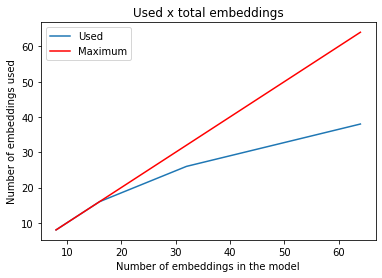

In [ ]:
# emb_dim = 16 
n_embeddings = [64, 32, 16, 8]
n_used_embeddings = [38, 26, 16, 8]
plt.plot(n_embeddings, n_used_embeddings, label = "Used")
plt.plot(n_embeddings, n_embeddings, color = 'red', label = 'Maximum')
plt.legend()
plt.title('Used x total embeddings')
plt.ylabel('Number of embeddings used')
plt.xlabel('Number of embeddings in the model')

Text(0.5, 0, 'Number of embeddings in the model')

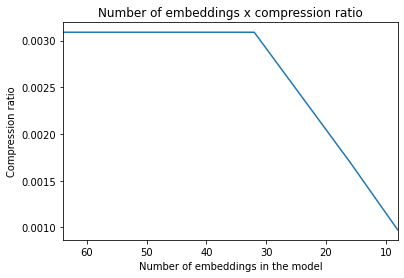

In [ ]:
compression = [0.003089, 0.003089, 0.00170, 0.000974]
n_embeddings = [64, 32, 16, 8]
plt.plot(n_embeddings, compression)
plt.xlim(max(n_embeddings), min(n_embeddings))
plt.title('Number of embeddings x compression ratio')
plt.ylabel('Compression ratio')
plt.xlabel('Number of embeddings in the model')

## Embedding use 2Dconv

In [ ]:
# emb_dim = varied 
n_embeddings = [64, 64, 64, 64, 64, 64, 64, 64, 64]
n_used_embeddings = [27, 23, 23, 32, 32, 27, 32, 21, 46, 46]
plt.plot(n_embeddings, n_used_embeddings, label = "Used")
plt.plot(n_embeddings, n_embeddings, color = 'red', label = 'Maximum')
plt.legend()
plt.title('Used x total embeddings')
plt.ylabel('Number of embeddings used')
plt.xlabel('Number of embeddings in the model')

Text(0.5, 0, 'Commiment cost')

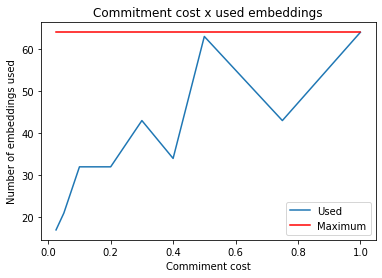

In [ ]:
# commitment cost = varied
# emb dim = 4
# n epochs = 10
commitment_cost = [1, 0.75, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.025]
n_used_embeddings = [64, 43, 63, 34, 43, 32, 32, 21, 17]
n_embeddings = [64, 64, 64, 64, 64, 64, 64, 64, 64]
plt.plot(commitment_cost, n_used_embeddings, label = "Used")
plt.plot(commitment_cost, n_embeddings, color = 'red', label = 'Maximum')
plt.legend()
plt.title('Commitment cost x used embeddings')
plt.ylabel('Number of embeddings used')
plt.xlabel('Commiment cost')

Text(0.5, 0, 'Commiment cost')

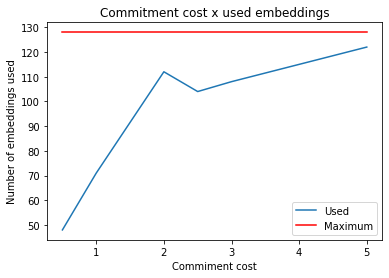

In [ ]:
# commitment cost = varied
# emb dim = 4
# n epochs = 10
commitment_cost = [5, 3, 2.5, 2, 1, 0.5]
n_used_embeddings = [122, 108, 104, 112, 71, 48]
n_embeddings = [128,128, 128, 128, 128, 128]
plt.plot(commitment_cost, n_used_embeddings, label = "Used")
plt.plot(commitment_cost, n_embeddings, color = 'red', label = 'Maximum')
plt.legend()
plt.title('Commitment cost x used embeddings')
plt.ylabel('Number of embeddings used')
plt.xlabel('Commiment cost')